## Spam Email Classifier with KNN using TF-IDF scores

1.   Assignment must be implemented in Python 3 only.
2.   You are allowed to use libraries for data preprocessing (numpy, pandas, nltk etc) and for evaluation metrics, data visualization (matplotlib etc.).
3.   You will be evaluated not just on the overall performance of the model and also on the experimentation with hyper parameters, data prepossessing techniques etc.
4.   The report file must be a well documented jupyter notebook, explaining the experiments you have performed, evaluation metrics and corresponding code. The code must run and be able to reproduce the accuracies, figures/graphs etc.
5.   For all the questions, you must create a train-validation data split and test the hyperparameter tuning on the validation set. Your jupyter notebook must reflect the same.
6.   Strict plagiarism checking will be done. An F will be awarded for plagiarism.

**Task: Given an email, classify it as spam or ham**

Given input text file ("emails.txt") containing 5572 email messages, with each row having its corresponding label (spam/ham) attached to it.

This task also requires basic pre-processing of text (like removing stopwords, stemming/lemmatizing, replacing email_address with 'email-tag', etc..).

You are required to find the tf-idf scores for the given data and use them to perform KNN using Cosine Similarity.

### Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
import nltk
import math
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from numpy import dot
from numpy.linalg import norm
import matplotlib.pyplot as plt

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

### Load dataset

In [ ]:
df=pd.read_csv('emails.txt', sep='\t', header=None, names=["label", "text"])


### Preprocess data

In [ ]:
df['text']=df['text'].str.replace('[\w\.-]+@[\w\.-]+','email-tag')
df['text']=df['text'].str.replace('[^a-zA-Z]',' ')
df['text'] = df['text'].str.replace('  ',' ')
df['text']=df['text'].str.lower()

In [ ]:
stop_words=set(stopwords.words("english"))
lem=WordNetLemmatizer()

In [ ]:
def preprocess(text):
  filtered_sent=[]
  for w in text.split():
    if w not in stop_words:
      filtered_sent.append(lem.lemmatize(w))
  return ' '.join(filtered_sent)

In [ ]:
df['text']=df['text'].apply(lambda x:preprocess(x))


In [ ]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(drop=True,inplace=True)

In [ ]:
df.head()

,label,text
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry wkly comp win fa cup final tkts st ...
3,ham,u dun say early hor u c already say
4,ham,nah think go usf life around though


In [ ]:
df.shape

(5058, 2)

In [ ]:
word_set=set()
def calculatewordset(text):
  global word_set
  l=text.split()
  word_set=word_set.union(set(l))

In [ ]:

def calculateworddict(text):
  worddict=dict.fromkeys(word_set,0)
  l=text.split()
  for word in l:
    worddict[word]+=1
  return worddict

In [ ]:
def calculateTF(worddict):
  tfdict={}
  total_no_of_words=len(worddict)
  for word,count in worddict.items():
    tfdict[word]=count/float(total_no_of_words)
  return tfdict


In [ ]:
df['text'].apply(lambda x: calculatewordset(x))

0       None
1       None
2       None
3       None
4       None
        ... 
5053    None
5054    None
5055    None
5056    None
5057    None
Name: text, Length: 5058, dtype: object

In [ ]:
len(word_set)

7107

In [ ]:
worddf=df['text'].apply(lambda x: calculateworddict(x))

In [ ]:
worddf.head()

0    {'order': 0, 'sol': 0, 'euro': 0, 'phony': 0, ...
1    {'order': 0, 'sol': 0, 'euro': 0, 'phony': 0, ...
2    {'order': 0, 'sol': 0, 'euro': 0, 'phony': 0, ...
3    {'order': 0, 'sol': 0, 'euro': 0, 'phony': 0, ...
4    {'order': 0, 'sol': 0, 'euro': 0, 'phony': 0, ...
Name: text, dtype: object

In [ ]:
worddf.shape

(5058,)

In [ ]:
Tf=worddf.apply(lambda x: calculateTF(x))

In [ ]:
Tf.head()

0    {'order': 0.0, 'sol': 0.0, 'euro': 0.0, 'phony...
1    {'order': 0.0, 'sol': 0.0, 'euro': 0.0, 'phony...
2    {'order': 0.0, 'sol': 0.0, 'euro': 0.0, 'phony...
3    {'order': 0.0, 'sol': 0.0, 'euro': 0.0, 'phony...
4    {'order': 0.0, 'sol': 0.0, 'euro': 0.0, 'phony...
Name: text, dtype: object

In [ ]:
No_of_sentences=Tf.shape[0]
idfdict={}
idfdict=dict.fromkeys(word_set,0)
def calculateIDF(worddict):
  for word,value in worddict.items():
    if(value>0):
      idfdict[word]+=1


In [ ]:
worddf.apply(lambda x: calculateIDF(x))


0       None
1       None
2       None
3       None
4       None
        ... 
5053    None
5054    None
5055    None
5056    None
5057    None
Name: text, Length: 5058, dtype: object

In [ ]:
Tfdataframe=pd.DataFrame.from_records(Tf)

In [ ]:
Tfdataframe.head()

,order,sol,euro,phony,quoting,torch,av,sneham,chick,hehe,goodo,muhommad,becz,lucozade,ti,gdeve,replying,hum,holby,jobyet,incomm,paid,wesley,aphex,amanda,single,nokias,mg,fried,disagreeable,yup,canname,active,uin,gin,tolerat,nora,jet,ummmmmaah,ystrday,...,pas,hitter,britney,fact,ldew,billy,th,owned,westshore,frwd,responsible,nonetheless,replacing,roommate,wiv,brighten,inpersonation,resizing,march,spiritual,remb,holiday,mushy,greatness,drove,whose,ppw,enjoy,offered,field,meow,cttargg,lovable,blogging,loverboy,huh,absolutly,river,notified,reasonable
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def calculateTFIDF():
  for word,val in idfdict.items():
    idfdict[word]=math.log10(No_of_sentences/float(val))
  idfseries=pd.Series(idfdict)
  tfidf=Tfdataframe.mul(idfseries)
  return tfidf

In [ ]:
tfidf_dataframe=calculateTFIDF()

In [ ]:
tfidf_dataframe['label']=df['label']

In [ ]:
tfidf_dataframe.iloc[103]['label']

'ham'

### Split data

In [ ]:
y=tfidf_dataframe.pop('label')
x=tfidf_dataframe

In [ ]:
y=y.map({"spam":1,"ham":0})

In [ ]:
y[y.isna()]

Series([], Name: label, dtype: int64)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,stratify=y)


In [ ]:
X_test.shape

(1012, 7107)

In [ ]:
Y_test.shape

(1012,)

In [ ]:
X_valid,X_test,Y_valid,Y_test=train_test_split(X_test,Y_test,test_size=0.5,stratify=Y_test)

In [ ]:
Y_train.value_counts()

0    3582
1     464
Name: label, dtype: int64

In [ ]:
Y_test.value_counts()

0    448
1     58
Name: label, dtype: int64

In [ ]:
X_train.head()

,order,sol,euro,phony,quoting,torch,av,sneham,chick,hehe,goodo,muhommad,becz,lucozade,ti,gdeve,replying,hum,holby,jobyet,incomm,paid,wesley,aphex,amanda,single,nokias,mg,fried,disagreeable,yup,canname,active,uin,gin,tolerat,nora,jet,ummmmmaah,ystrday,...,pas,hitter,britney,fact,ldew,billy,th,owned,westshore,frwd,responsible,nonetheless,replacing,roommate,wiv,brighten,inpersonation,resizing,march,spiritual,remb,holiday,mushy,greatness,drove,whose,ppw,enjoy,offered,field,meow,cttargg,lovable,blogging,loverboy,huh,absolutly,river,notified,reasonable
358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1440,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3443,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train_list=[]

X_valid_list=[]

for i in range(X_train.shape[0]):
  X_train_list.append(X_train.iloc[i].to_numpy())

for i in range(X_valid.shape[0]):
  X_valid_list.append(X_valid.iloc[i].to_numpy())



In [ ]:
Y_valid_array=Y_valid.to_numpy()

In [ ]:
Y_test_array=Y_test.to_numpy()

In [ ]:
X_test_list=[]

for i in range(X_test.shape[0]):
  X_test_list.append(X_test.iloc[i].to_numpy())


In [ ]:
X_train[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
X_test.shape[0]

506

### Train your KNN model (reuse previously iplemented model built from scratch) and test on your data

***1. Experiment with different distance measures [Euclidean distance, Manhattan distance, Hamming Distance] and compare with the Cosine Similarity distance results.***

In [ ]:
def Euclidean_distance(a,b):
  return np.linalg.norm(a-b)

In [ ]:
def Cosine_similarity(a,b):
  return dot(a,b)/(norm(a)*norm(b))

In [ ]:
def Cosine_distance(a,b):
  return 1-Cosine_similarity(a,b)

In [ ]:
def Manhattan_distance(a,b):
  return np.abs(a-b).sum()

In [ ]:

def find_neighbours(test,metric=Euclidean_distance):
  X_train_length=len(X_train_list)
  neighbours=np.zeros((X_train_length))
  for i in range(X_train_length):
    # print(Euclidean_distance(X_train[i],test))
    neighbours[i]= metric(X_train_list[i],test)
    # print(i)
  return neighbours
  
  

In [ ]:
def majority(neighbours,k=5):
  idx=np.argpartition(neighbours,k)
  # print(neighbours[idx[:k]])
  return Y_train.iloc[idx[:k]].mode()[0]

In [ ]:
neighbours=[]
def predict(x_test,k_v=5,metric=Euclidean_distance):
  X_test_length=len(x_test)
  y_pred=np.zeros((X_test_length),dtype=int)
  if len(neighbours)==0:
    for i in range(X_test_length):
      neighbours.append(find_neighbours(x_test[i],metric=metric))
  for i in range(X_test_length):
    y_pred[i] = majority(neighbours[i],k=k_v)
  return y_pred


506

In [ ]:
## KNN using Euclidean distance for k=1,3,5,7,11,17,23,28
Accuracy_score_euclidean={}
Y_pred_Euclidean={}
for k_value in [1,3,5,7,11,17,23,28]:
  Y_pred_Euclidean[k_value]=predict(X_valid_list,k_v=k_value,metric=Euclidean_distance)
  Accuracy_score_euclidean[k_value]=accuracy_score(Y_valid_array,Y_pred_Euclidean[k_value])
  print(k_value,"=>",Accuracy_score_euclidean[k_value])

1 => 0.9387351778656127
3 => 0.9209486166007905
5 => 0.9090909090909091
7 => 0.9011857707509882
11 => 0.8913043478260869
17 => 0.8873517786561265
23 => 0.8853754940711462
28 => 0.8853754940711462


In [ ]:
F1_score_euclidean={}
for k in Y_pred_Euclidean.keys():
  F1_score_euclidean[k]=f1_score(Y_valid_array,Y_pred_Euclidean[k])
  print(k,"=>",F1_score_euclidean[k])

1 => 0.6352941176470588
3 => 0.4736842105263158
5 => 0.34285714285714286
7 => 0.2424242424242424
11 => 0.09836065573770492
17 => 0.03389830508474576
23 => 0.0
28 => 0.0


In [ ]:
## KNN using Cosine similarity for k=1,3,5,7,11,17,23,28
Accuracy_score_cosine={}
Y_pred_Cosine={}
for k_value in [1,3,5,7,11,17,23,28]:
  Y_pred_Cosine[k_value]=predict(X_valid_list,k_v=k_value,metric=Cosine_distance)
  Accuracy_score_cosine[k_value]=accuracy_score(Y_valid_array,Y_pred_Cosine[k_value])
  print(k_value,"=>",Accuracy_score_cosine[k_value])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


1 => 0.9565217391304348
3 => 0.9525691699604744
5 => 0.9525691699604744
7 => 0.9525691699604744
11 => 0.9565217391304348
17 => 0.9565217391304348
23 => 0.958498023715415
28 => 0.958498023715415


In [ ]:
F1_score_cosine={}
for k in Y_pred_Cosine.keys():
  F1_score_cosine[k]=f1_score(Y_valid_array,Y_pred_Cosine[k])
  print(k,"=>",F1_score_cosine[k])

1 => 0.78
3 => 0.7446808510638298
5 => 0.7446808510638298
7 => 0.7446808510638298
11 => 0.7708333333333335
17 => 0.7708333333333335
23 => 0.7835051546391754
28 => 0.7789473684210527


In [ ]:
## KNN using Manhattan distance for k=1,3,5,7,11,17,23,28
Accuracy_score_manhattan={}
Y_pred_Manhattan={}
for k_value in [1,3,5,7,11,17,23,28]:
  Y_pred_Manhattan[k_value]=predict(X_valid_list,k_v=k_value,metric=Manhattan_distance)
  Accuracy_score_manhattan[k_value]=accuracy_score(Y_valid_array,Y_pred_Manhattan[k_value])
  print(k_value,"=>",Accuracy_score_manhattan[k_value])

1 => 0.9347826086956522
3 => 0.9189723320158103
5 => 0.9110671936758893
7 => 0.9011857707509882
11 => 0.8932806324110671
17 => 0.8932806324110671
23 => 0.8853754940711462
28 => 0.8853754940711462


In [ ]:
F1_score_manhattan={}
for k in Y_pred_Cosine.keys():
  F1_score_manhattan[k]=f1_score(Y_valid_array,Y_pred_Manhattan[k])
  print(k,"=>",F1_score_manhattan[k])

1 => 0.6024096385542169
3 => 0.4533333333333333
5 => 0.36619718309859156
7 => 0.2424242424242424
11 => 0.12903225806451613
17 => 0.12903225806451613
23 => 0.0
28 => 0.0


In [ ]:
print("K","Euclidean_Accuracy","Manhattan_Accuracy","Cosine_Accuracy",sep="\t")
for k in [1,3,5,7,11,17,23,28]:
  print(k,Accuracy_score_euclidean[k],Accuracy_score_manhattan[k],Accuracy_score_cosine[k],sep="\t")

K	Euclidean_Accuracy	Manhattan_Accuracy	Cosine_Accuracy
1	0.9387351778656127	0.9347826086956522	0.9565217391304348
3	0.9209486166007905	0.9189723320158103	0.9525691699604744
5	0.9090909090909091	0.9110671936758893	0.9525691699604744
7	0.9011857707509882	0.9011857707509882	0.9525691699604744
11	0.8913043478260869	0.8932806324110671	0.9565217391304348
17	0.8873517786561265	0.8932806324110671	0.9565217391304348
23	0.8853754940711462	0.8853754940711462	0.958498023715415
28	0.8853754940711462	0.8853754940711462	0.958498023715415


In [ ]:
print("K","Euclidean_F1score","Manhattan_F1score","Cosine_F1score",sep="\t")
for k in [1,3,5,7,11,17,23,28]:
  print(k,F1_score_euclidean[k],F1_score_manhattan[k],F1_score_cosine[k],sep="\t")

K	Euclidean_F1score	Manhattan_F1score	Cosine_F1score
1	0.6352941176470588	0.6024096385542169	0.78
3	0.4736842105263158	0.4533333333333333	0.7446808510638298
5	0.34285714285714286	0.36619718309859156	0.7446808510638298
7	0.2424242424242424	0.2424242424242424	0.7446808510638298
11	0.09836065573770492	0.12903225806451613	0.7708333333333335
17	0.03389830508474576	0.12903225806451613	0.7708333333333335
23	0.0	0.0	0.7835051546391754
28	0.0	0.0	0.7789473684210527


In [ ]:
#Euclidean Cross verify using SKLearn library
print("K","Accuracy","F1 score",sep="\t")
for k in [1,3,5,7,11,17,23,28]:
  knn = KNeighborsClassifier(n_neighbors=k,p=2)
  knn.fit(X_train, Y_train)
  y_pred = knn.predict(X_valid)
  print(k,accuracy_score(Y_valid,y_pred),f1_score(Y_valid,y_pred),sep="\t")


K	Accuracy	F1 score
1	0.9387351778656127	0.6352941176470588
3	0.9209486166007905	0.4736842105263158
5	0.9090909090909091	0.34285714285714286
7	0.9011857707509882	0.2424242424242424
11	0.8913043478260869	0.09836065573770492
17	0.8873517786561265	0.03389830508474576
23	0.8853754940711462	0.0
28	0.8853754940711462	0.0


In [ ]:
#Manhattan Cross verify using SKLearn library
print("K","Accuracy","F1 score",sep="\t")
for k in [1,3,5,7,11,17,23,28]:
  knn = KNeighborsClassifier(n_neighbors=k,p=1)
  knn.fit(X_train, Y_train)
  y_pred = knn.predict(X_valid)
  print(k,accuracy_score(Y_valid,y_pred),f1_score(Y_valid,y_pred),sep="\t")


K	Accuracy	F1 score
1	0.9347826086956522	0.6024096385542169
3	0.9189723320158103	0.4533333333333333
5	0.9110671936758893	0.36619718309859156
7	0.9011857707509882	0.2424242424242424
11	0.8932806324110671	0.12903225806451613
17	0.8932806324110671	0.12903225806451613
23	0.8853754940711462	0.0
28	0.8853754940711462	0.0


In [ ]:
#Cosine Cross verify using SKLearn library
print("K","Accuracy","F1 score",sep="\t")
for k in [1,3,5,7,11,17,23,28]:
  knn = KNeighborsClassifier(n_neighbors=k,metric="cosine")
  knn.fit(X_train, Y_train)
  y_pred = knn.predict(X_valid)
  print(k,accuracy_score(Y_valid,y_pred),f1_score(Y_valid,y_pred),sep="\t")


K	Accuracy	F1 score
1	0.9565217391304348	0.78
3	0.9525691699604744	0.7446808510638298
5	0.9525691699604744	0.7446808510638298
7	0.9525691699604744	0.7446808510638298
11	0.9565217391304348	0.7708333333333335
17	0.9565217391304348	0.7708333333333335
23	0.958498023715415	0.7835051546391754
28	0.958498023715415	0.7789473684210527


***2. Explain which distance measure works best and why? Explore the distance measures and weigh their pro and cons in different application settings.***

**Best Measure**

Cosine similarity gives better results as the data is of higher dimension. Also the emails(documents) have uneven lengths, Cosine similarity does not consider the magnitude of data




**Euclidean Distance**

It calculates the L2 norm between two data points.

**Pros**
- Works when you have Low dimensional data.
- Simple to implement and shows great results in KNN

**Cons**
- One needs to normalise before using this distance measure.
- As the dimensionality increases, the less useful Euclidean measure becomes.

**Cosine Distance**

It is counteract with Euclidean distance measure. It is the cosine of the angle between two vectors.
 
 **Pros**
 - Does not consider magnitude of the vectors.
 - Works good with high dimensional data.


 **Cons**

- Documents may have uneven lengths. Cosine measure is not efficient in text analysis where there exists more words in one document.

**Manhattan Distance**

 It calculates the L1 norm between two data points.

 **Pros**
 - It works well when the data is discrete / has binary attributes.


 **Cons**
 - It gives a higher distance value than Euclidean measure.

**Jaccard Distance**

It is used to calulate similarity and diversity of smaple sets.

**Pros**

- It is used in applicarions where binary or binarized data is used.
- It is used in text similarity analysis, predicting segments of an image.

**Cons**
- It is highly influenced by the size of the data. Larger datasets will have higher amount of union when compared to intersection.



***3. Report Mean Squared Error(MSE), Mean-Absolute-Error(MAE), R-squared (R2) score in a tabular form***

***4. Choose different K values (k=1,3,5,7,11,17,23,28) and experiment. Plot a graph showing R2 score vs k.***

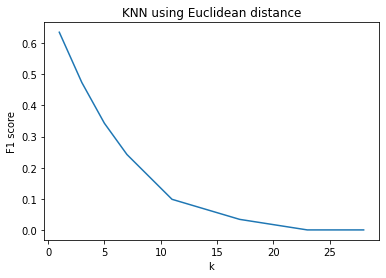

In [ ]:
plt.plot(list(F1_score_euclidean.keys()),list(F1_score_euclidean.values()))
plt.xlabel('k')
plt.ylabel('F1 score')
plt.title('KNN using Euclidean distance')
plt.show()

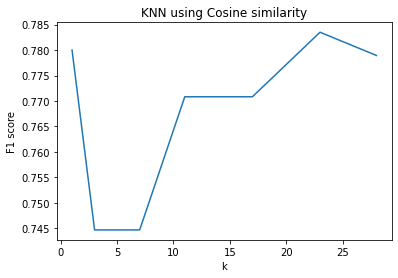

In [ ]:
plt.plot(list(F1_score_cosine.keys()),list(F1_score_cosine.values()))
plt.xlabel('k')
plt.ylabel('F1 score')
plt.title('KNN using Cosine similarity')
plt.show()

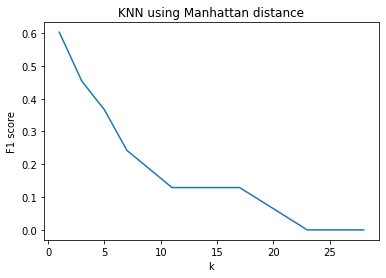

In [ ]:
plt.plot(list(F1_score_manhattan.keys()),list(F1_score_manhattan.values()))
plt.xlabel('k')
plt.ylabel('F1 score')
plt.title('KNN using Manhattan distance')
plt.show()

### Train and test Sklearn's KNN classifier model on your data (use metric which gave best results on your experimentation with built-from-scratch model.)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10,metric='cosine')
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)

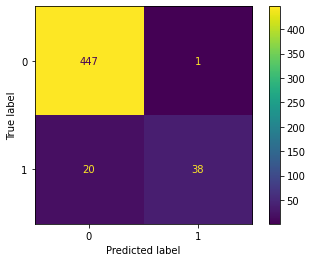

In [ ]:
cm = confusion_matrix(Y_test_array, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
cnf_matrix = cm.tolist()

tn_fp, fn_tp = cnf_matrix

tn, fp = tn_fp
fn, tp = fn_tp

In [ ]:
accuracy_sk_model=(tp+tn)/(tp+tn+fp+fn)
precision_sk_model=tp/(tp+fp)
recall_sk_model=tp/(tp+fn)


Accuracy:  0.958498023715415
Precision:  0.9743589743589743
Recall:  0.6551724137931034
F1 score:  0.7835051546391754


In [ ]:
Y_predicted=predict(X_test_list,k_v=5,metric=Cosine_distance)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


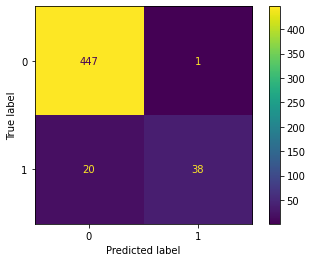

In [ ]:
cm = confusion_matrix(Y_test_array, Y_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [ ]:
cnf_matrix = cm.tolist()

tn_fp, fn_tp = cnf_matrix

tn, fp = tn_fp
fn, tp = fn_tp

In [ ]:
accuracy_developed_model=(tp+tn)/(tp+tn+fp+fn)
precision_developed_model=tp/(tp+fp)
recall_developed_model=tp/(tp+fn)


Accuracy:  0.958498023715415
Precision:  0.9743589743589743
Recall:  0.6551724137931034
F1 score:  0.7835051546391754


***Compare both the models result.***

# Metrics of SK Learn Model


In [ ]:

print("Accuracy: ",accuracy_sk_model)
print("Precision: ",precision_sk_model)
print("Recall: ",recall_sk_model)
print("F1 score: ",2*precision_sk_model*recall_sk_model/(precision_sk_model+recall_sk_model))

Accuracy:  0.958498023715415
Precision:  0.9743589743589743
Recall:  0.6551724137931034
F1 score:  0.7835051546391754


# Metrics of Developed Model

In [ ]:
print("Accuracy: ",accuracy_developed_model)
print("Precision: ",precision_developed_model)
print("Recall: ",recall_developed_model)
print("F1 score: ",2*precision_developed_model*recall_developed_model/(precision_developed_model+recall_developed_model))

Accuracy:  0.958498023715415
Precision:  0.9743589743589743
Recall:  0.6551724137931034
F1 score:  0.7835051546391754


***What is the time complexity of training using KNN classifier?***

KNN is know as lazy learner. It does not have training phase. 

It calculates the distances of every test point with the given points and computes the nearest neighbours. 

Hence the complexity of training phase : **O(1)**



***What is the time complexity while testing? Is KNN a linear classifier or can it learn any boundary?***